In [2]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot energy required for elites, in terms of the average number of required iterations to produce an elite.

The data is viewed vertically for each cell and horizontally across the iterations.

In [97]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973723978.json'
json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "elitesEnergy: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

Plot the average energy per cell.

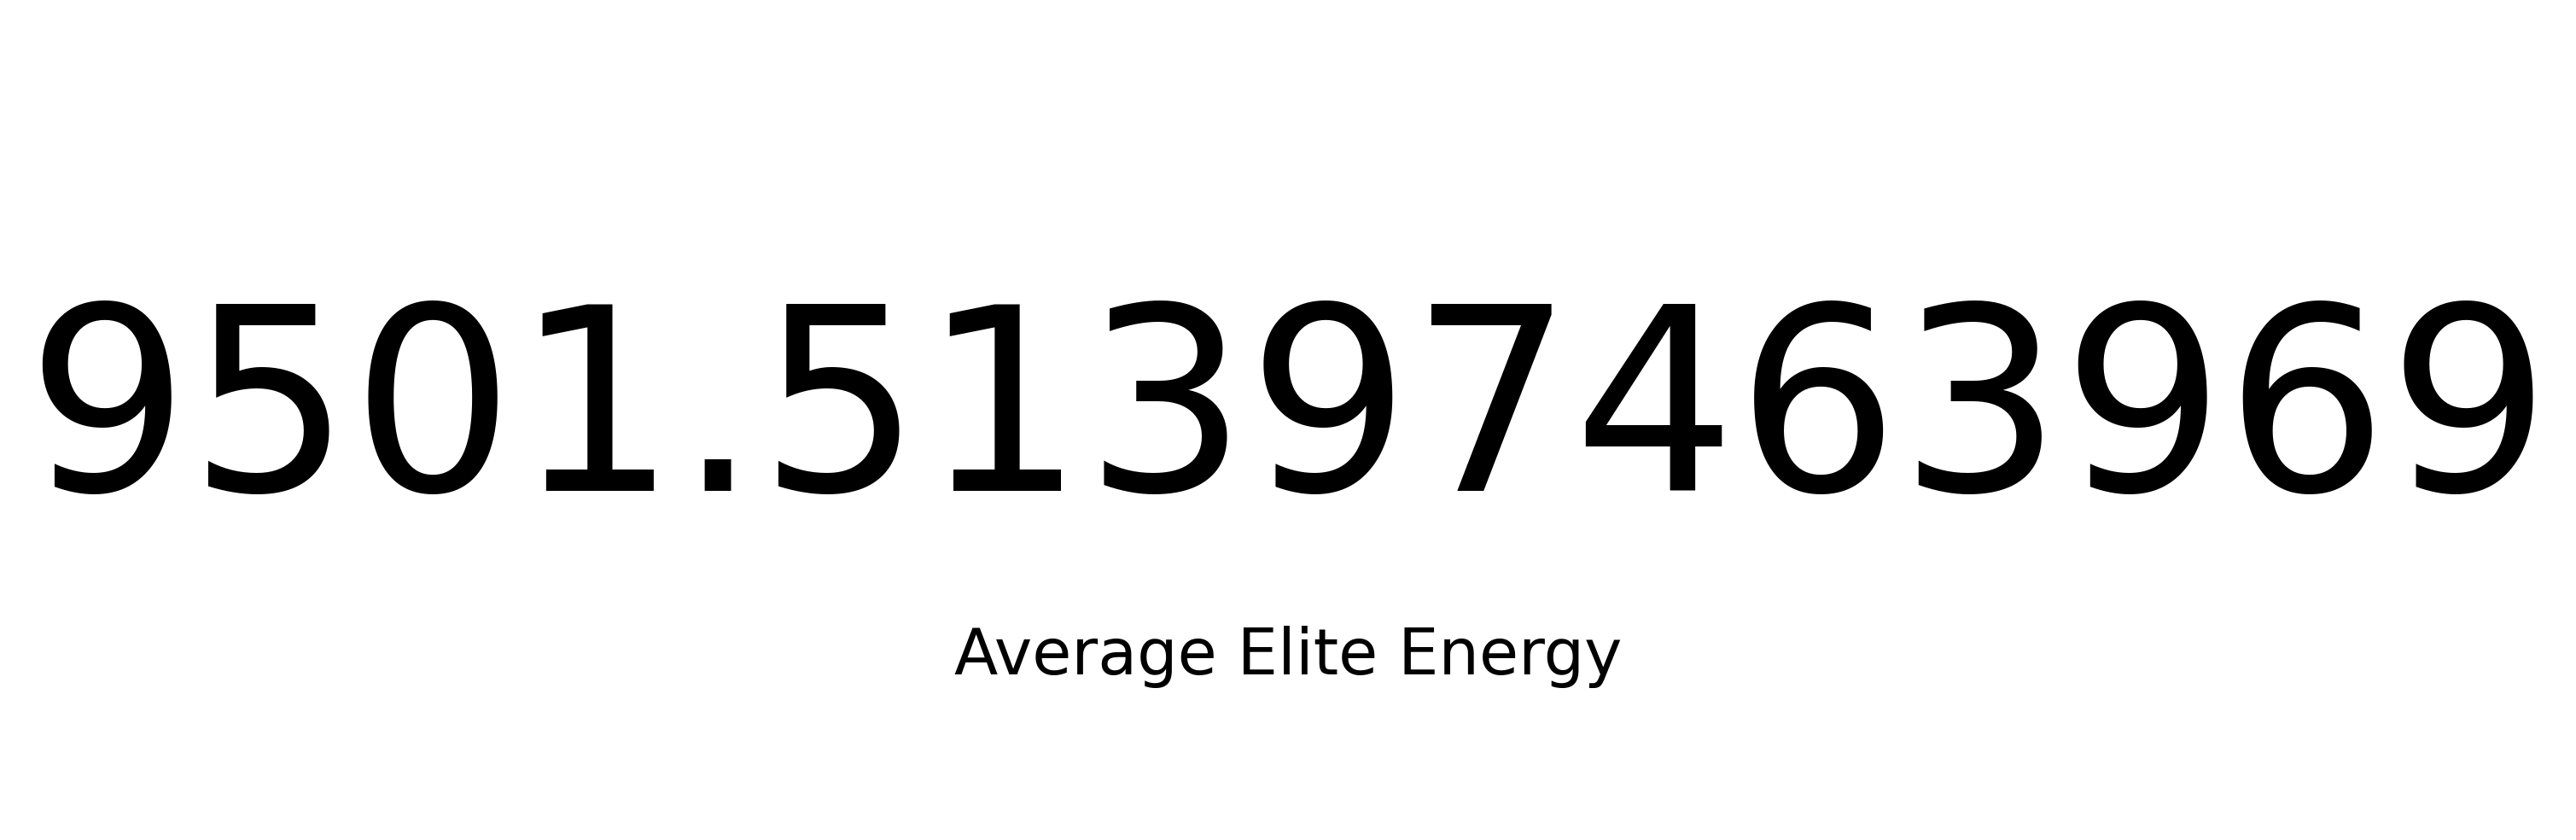

In [82]:
average_elite_energy = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['averageEnergy']

# Plot the single value from average_elite_energy
import matplotlib.pyplot as plt

def plot_number_with_label(number, label):
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the figure size as per your preference
    ax.text(0.5, 0.5, str(number), fontsize=72, ha='center', va='center')
    ax.text(0.5, 0.2, label, fontsize=18, ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')  # Hide the axis

    plt.show()

plot_number_with_label(average_elite_energy, "Average Elite Energy")



**For all evoruns**: Plot the average energy per cell.

In [98]:
average_energy_arrays = plotUtil.extract_data_arrays(data, 'elitesEnergy', False)

def plotAverageEnergy(plt, ax, x_values, value, label):
    ax.text(0.5, 0.5, str(value["averageEnergy"]), fontsize=72, ha='center', va='center')
    ax.text(0.5, 0.2, label, fontsize=18, ha='center', va='center')
    ax.axis('off')  # Hide the axis
    # plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plotUtil.render_graphs(average_energy_arrays, x_multiplier, plotAverageEnergy, 40, 20, "Average Elite Energy", 300)

Plot the average elite iteration engergy.

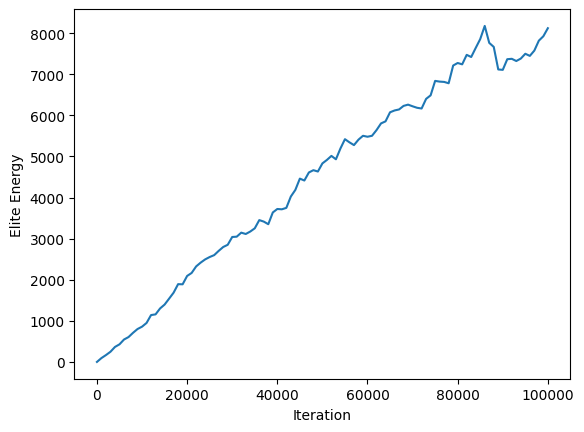

In [6]:
eliteIterationEnergies = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['eliteIterationEnergies']

# Plot the list of values from eliteIterationEnergies
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(eliteIterationEnergies)) * x_multiplier, eliteIterationEnergies)
plt.xlabel('Iteration')
plt.ylabel('Elite Energy')
plt.show()


**For each evorun**: Plot eliteIterationEnerties.

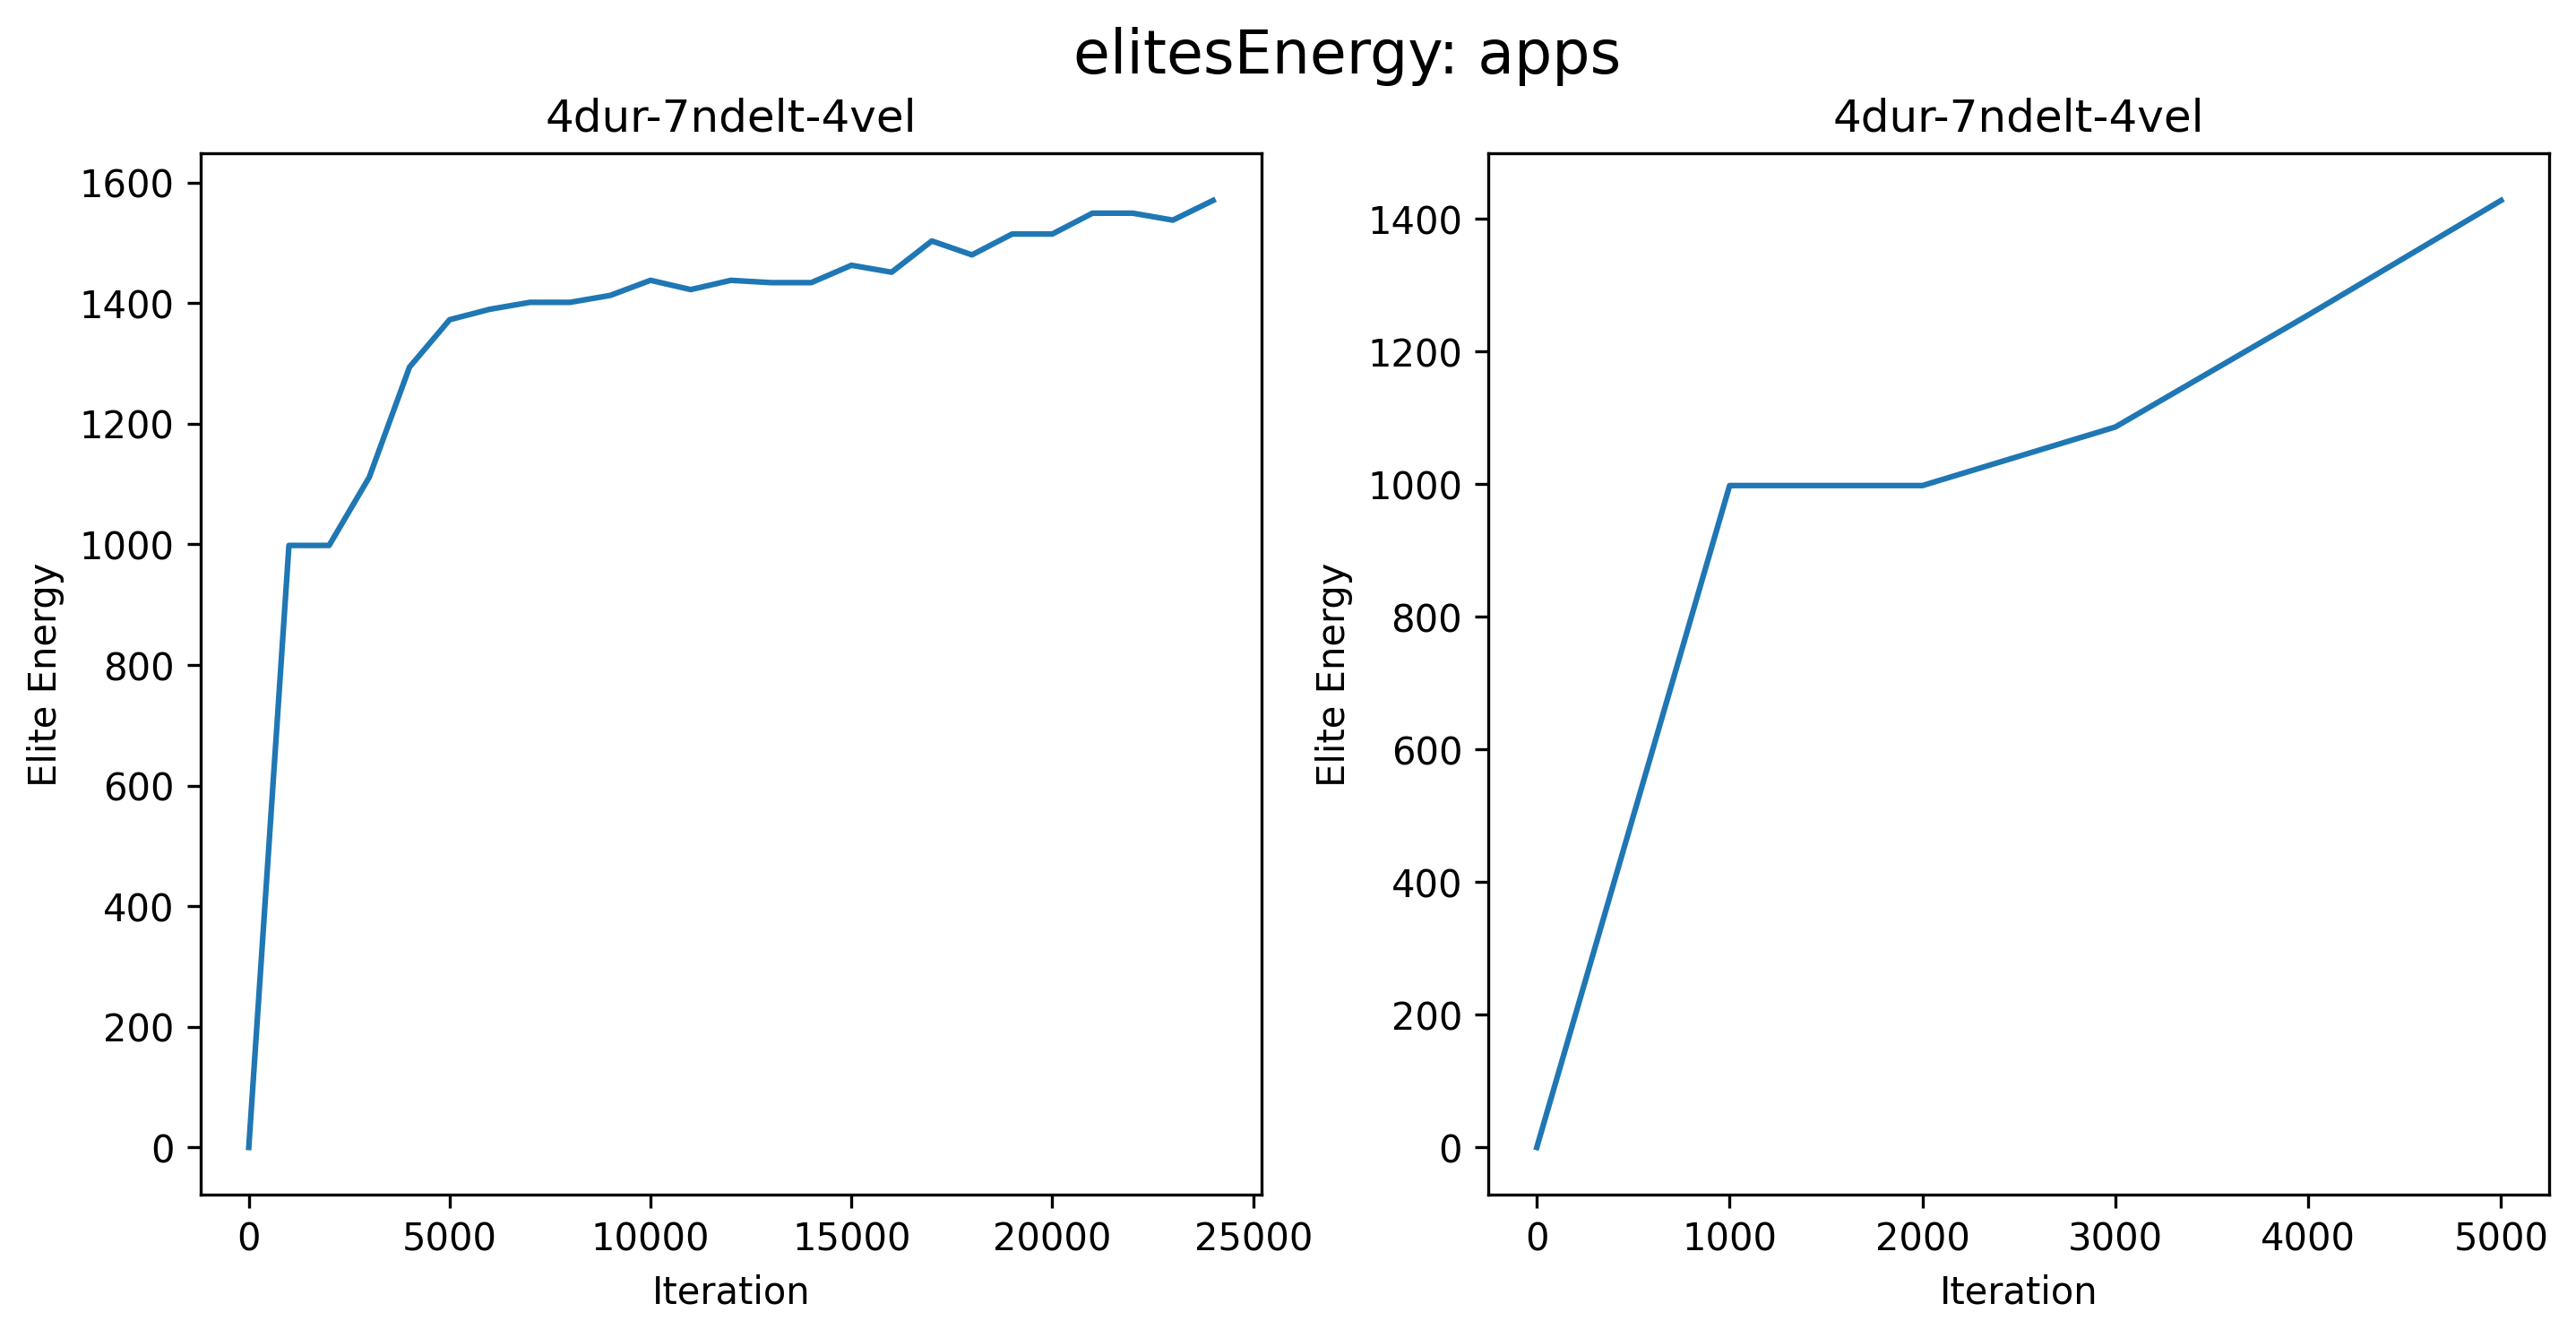

In [101]:
def plotEliteIterationEnergies(plt, ax, x_values, value, title):

    if len(title) > 50:
        title = title[:50] + '\n' + title[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.96)

    array = value['eliteIterationEnergies']
    ax.plot(np.arange(len(array)) * x_multiplier, array, label=title)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Elite Energy')
    ax.set_title(title)
    # ax.legend()

plotUtil.render_graphs(average_energy_arrays, x_multiplier, plotEliteIterationEnergies, 10, 5, title, 300)

Plot a histogram of the average energy required to produce an elite, per cell.

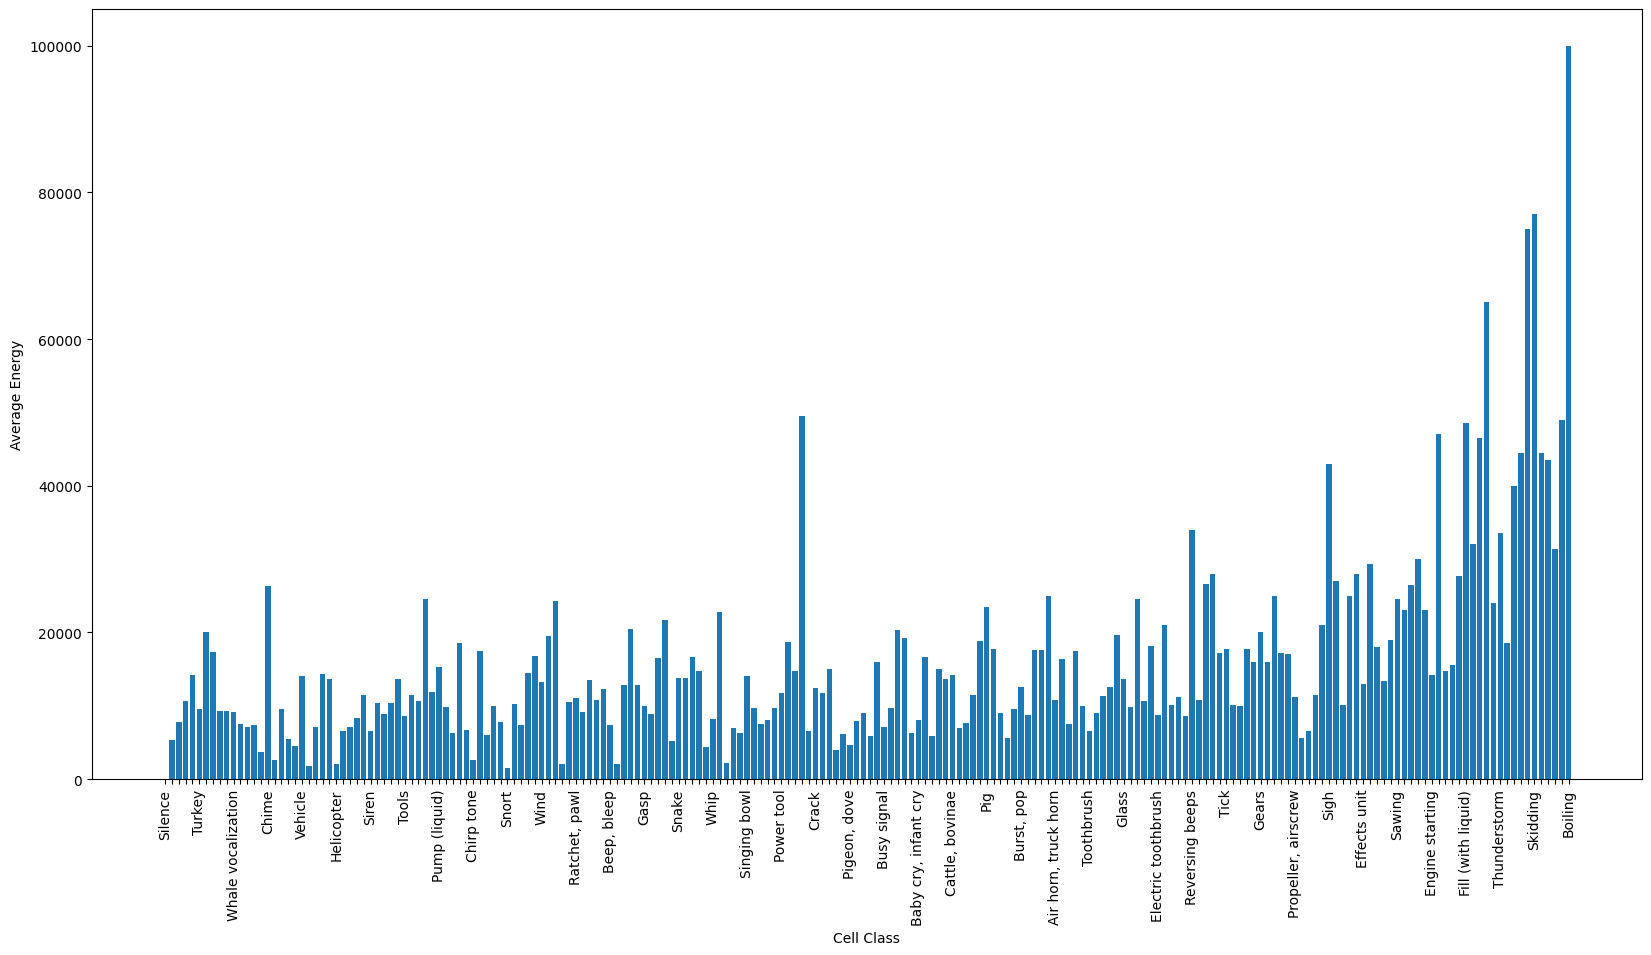

In [8]:
averageEnergyPerCell = data['evoRuns'][0]['iterations'][0]['elitesEnergy']['averageEnergyPerCell']

# Plot a histogram from the dictionary averageEnergyPerCell, where the keys are class labels and the values are the data points
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(averageEnergyPerCell.keys(), averageEnergyPerCell.values())
plt.xlabel('Cell Class')
plt.ylabel('Average Energy')
# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# print only every 5th x-axis label
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)
plt.show()



TODO: Could this be a JoyPy plot, not with average values but across iterations (with some step size)?

**For all evoruns**: Plot a histogram of the average energy required to produce an elite, per cell.

In [76]:
import numpy as np
# copy/paste (largely) from durationPitchDeltaVelocityCombinations.ipynb / eliteGenerations.ipynb
def subplot_par_chart_from_key_value_arrays(plt, ax, keys, values, title, hspace=0.4):

    # trim all strings in keys to the first .. characters
    keys = [key[:10] for key in keys]

    pos = np.arange(len(keys))
    ax.bar(pos, values, align='center')
    ax.set_xticks(pos)
    ax.set_xticklabels(keys, rotation=90)
    ax.set_title(title)
    
    ax.set_xlabel('Cell Class')
    ax.set_ylabel('Average Energy')

    for index, label in enumerate(ax.get_xticklabels()):
        if index % 10 != 0:
            label.set_visible(False)

    plt.subplots_adjust(hspace=hspace)

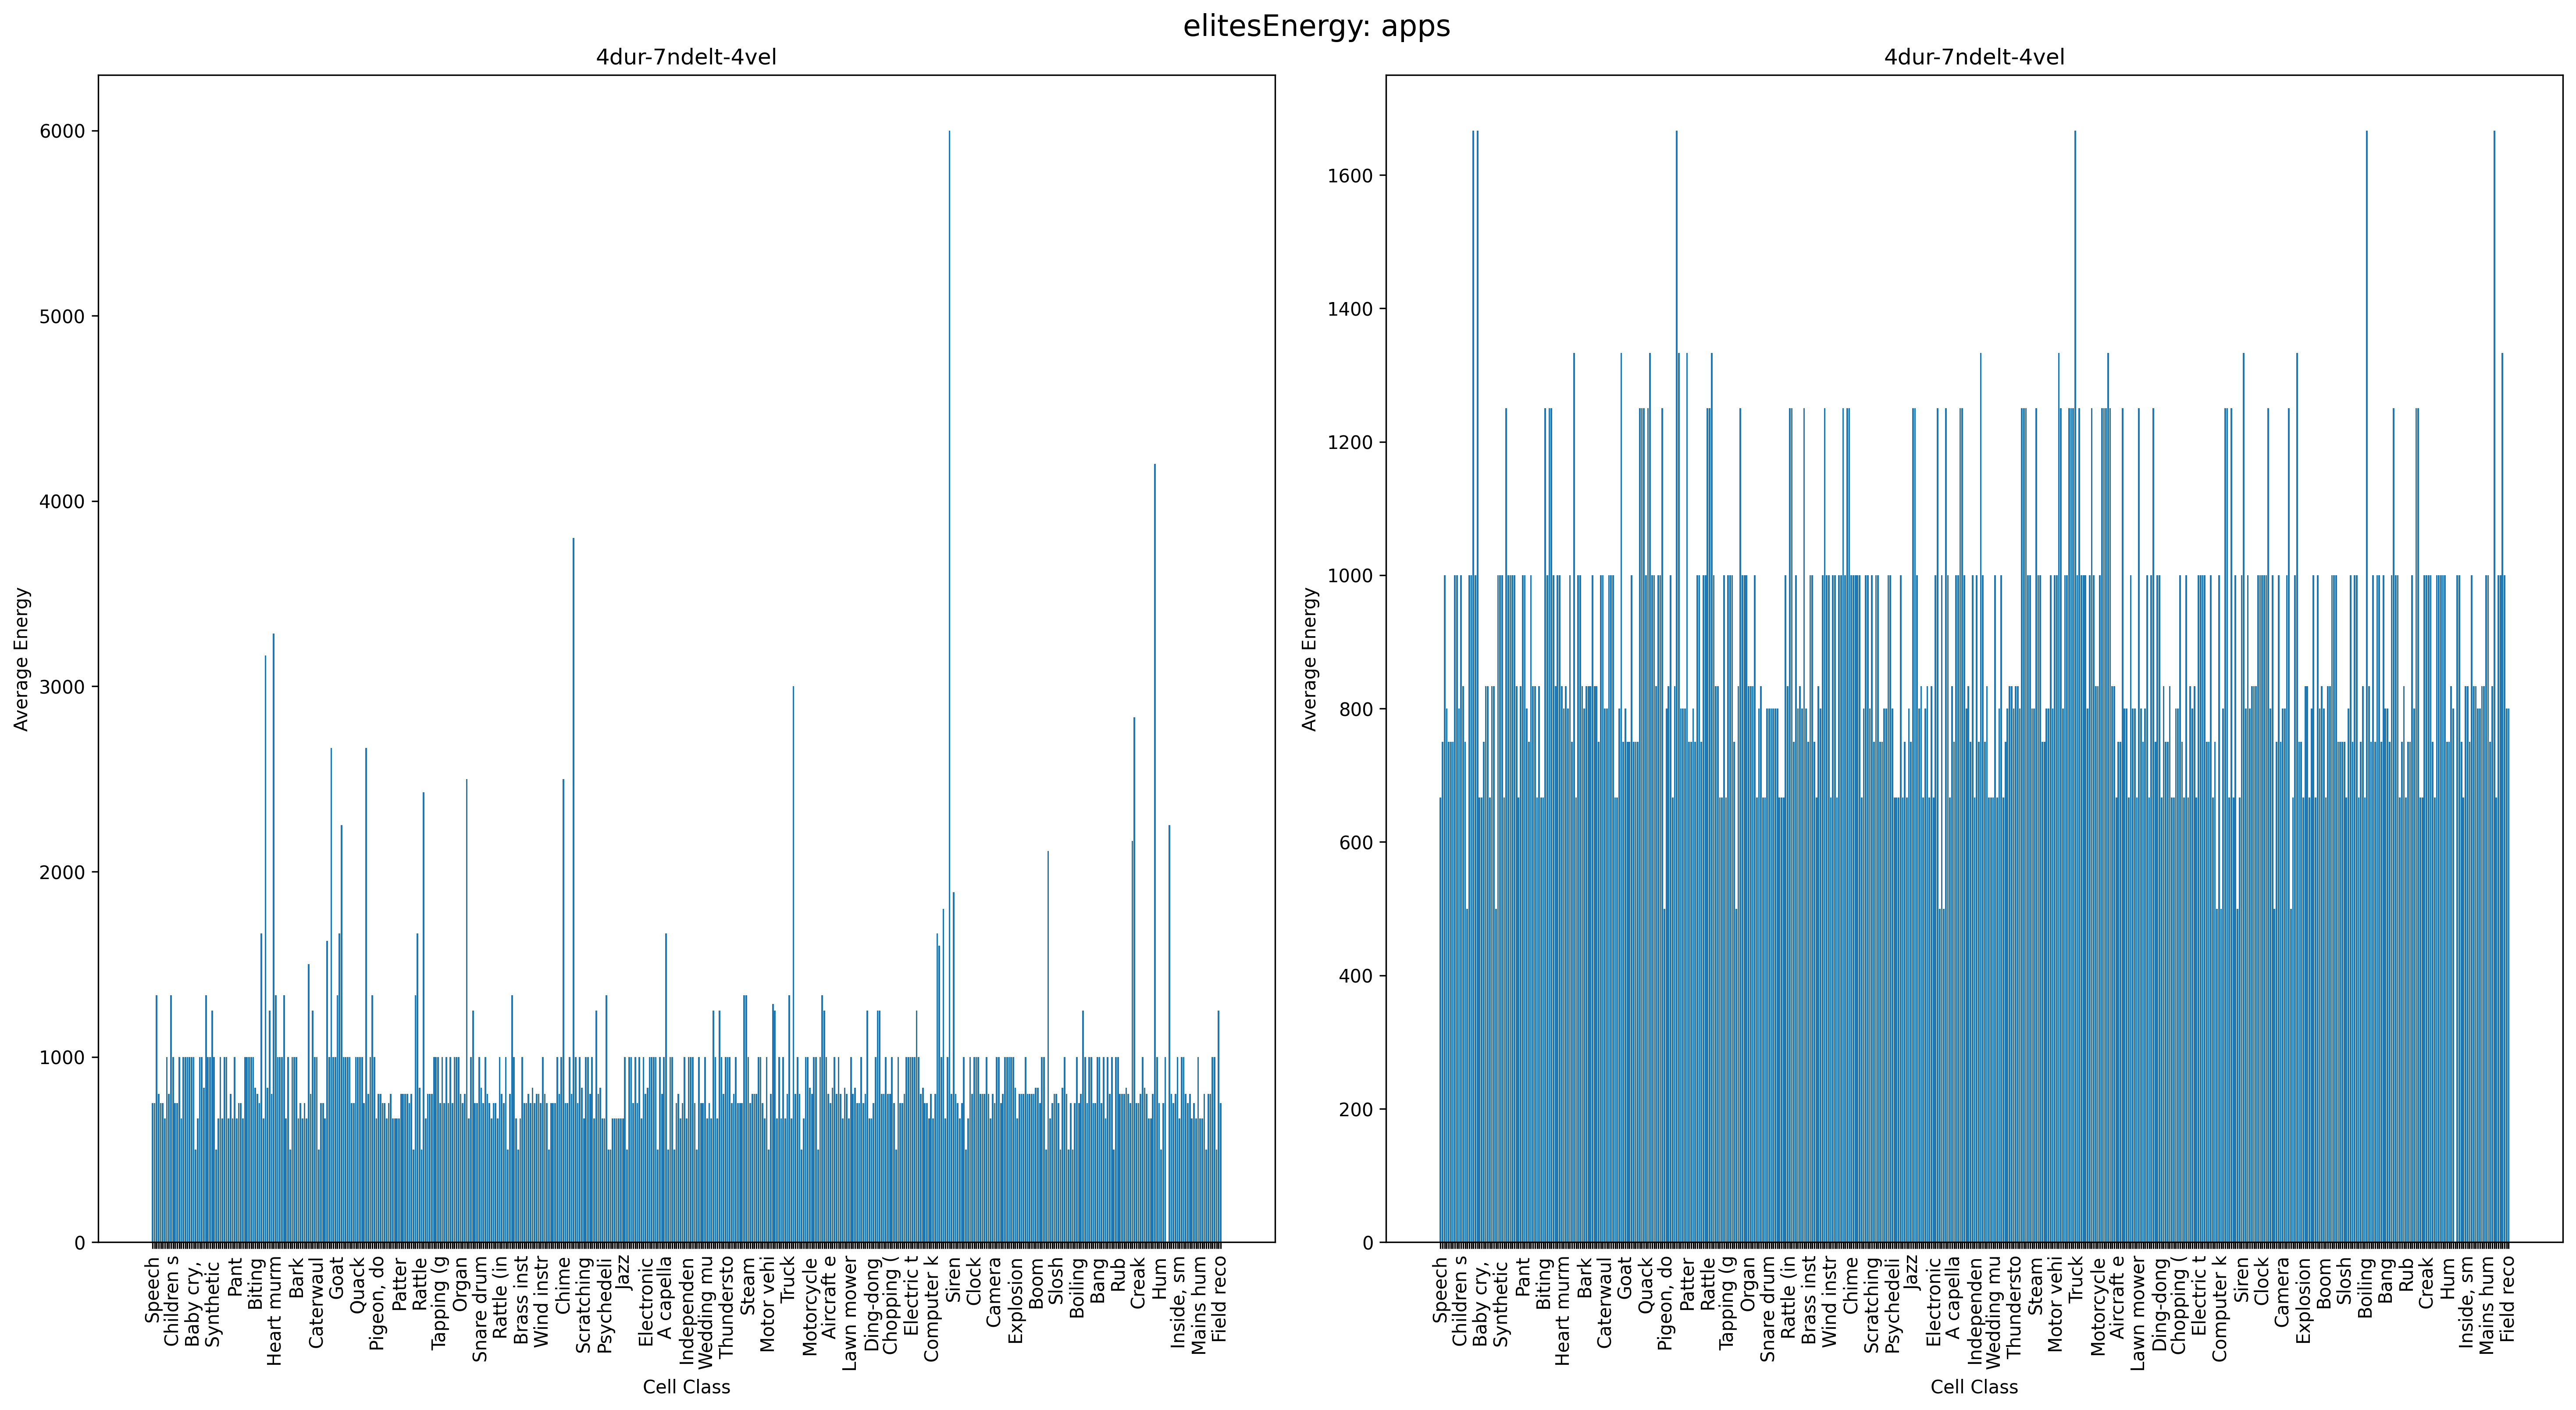

In [104]:
def plotAverageEnergyPerCell(plt, ax, x_values, value, label):
    subplot_par_chart_from_key_value_arrays(plt, ax, value['averageEnergyPerCell'].keys(), value['averageEnergyPerCell'].values(), label, 0.2)

plotUtil.render_graphs(average_energy_arrays, x_multiplier, plotAverageEnergyPerCell, 20, 10, title, 300)